# COSC401 Assignment 1
## Andrew French 
### ID: 11147452

Below is all of the libraries and modules needed for the entire program being imported. 
Make sure to run this step before running any of the feature code.

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from IPython.display import Latex

Below is all of the variables set that are global to the program.

In [84]:
np.random.seed(19680801)
plt.rcParams['figure.figsize'] = (10,5)
K_FOLD_SPLITS = 8
MINIMUM_INCREASE_ACCURACY_PER_DEPTH = 0.01
TEST_DATA_SIZE = 0.4

## Part 1 - Tuning Hyper-parameters

In [30]:
def crossValidateAtDepth(X, Y, max_depth):
    """
    Cross validate the given training data with a maximum DecisionTreeClassifier depth as given.
    Cross validation is done via the k-fold method.
    
    Parameters:
        X -> The X value as a np array
        Y -> The Y value as a np array
        max_depth -> The maximum depth of the tree as an int
    
    Returns:
        A tuple containing the average score of the folds, the average nodes of the folds, and the maximum tree depth of the folds
    """    
    kf = KFold(n_splits=K_FOLD_SPLITS, shuffle=True)

    total_score = 0
    total_nodes = 0
    depth_achieved = 0

    for train, validate in kf.split(X):
        classifier = tree.DecisionTreeClassifier(max_depth=max_depth)
        classifier.fit(X[train], Y[train])
        score = classifier.score(X[validate], Y[validate])
        total_score += score
        total_nodes += classifier.tree_.node_count
        depth_achieved = max(depth_achieved, classifier.tree_.max_depth)
    return total_score / K_FOLD_SPLITS, total_nodes / K_FOLD_SPLITS, depth_achieved

In [35]:
def findIdealDepthValueFromDataset(dataframe):
    """
    Find the ideal depth value from the Dataframe dataset, parsing the table for the accuracy row.
    This function iterates through each value of Accuracy and if the value of accyracy is greater than the minimum
    increase then the depth value is updated.
    
    Parameters:
        dataframe -> the pandas Dataframe object to be iterated through
    
    Returns:
        The ideal depth of the tree based on the best value of the accuracy
    """
    prev = dataframe.iloc[0]
    ideal_depth = 1
    for depth, row in dataframe.iloc[1:].iterrows():
        if prev["Accuracy"] + MINIMUM_INCREASE_ACCURACY_PER_DEPTH > row["Accuracy"]:
            break
        prev = row
        ideal_depth = depth    
    return ideal_depth

-------------------------------------------
Training the iris dataset...
Test = 40% - Train = 60%
   Depth  Avg # of Nodes  Accuracy
1    1.0            3.00  0.609848
2    2.0            5.00  0.945076
3    3.0            6.75  0.954545
4    4.0            8.75  0.944129
The best value for the depth hyper-parameter is 2
Testing the iris dataset with test data and with hyper-parameter...
Number of nodes: 5
Accuracy: 0.8666666666666667
Resulting tree:


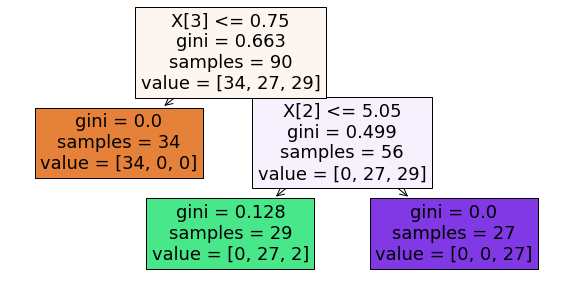

---------------------------------------------------
Training the breast cancer dataset...
Test = 40% - Train = 60%
   Depth  Avg # of Nodes  Accuracy
1    1.0            3.00  0.915075
2    2.0            7.00  0.905939
3    3.0           13.75  0.926633
4    4.0           18.75  0.909122
5    5.0           24.00  0.929333
6    6.0           28.75  0.917843
7    7.0           28.75  0.914729
The best value for the depth hyper-parameter is 1
Testing the breast cancer dataset with test data and with hyper-parameter...
Number of nodes: 3
Accuracy: 0.881578947368421
Resulting tree:


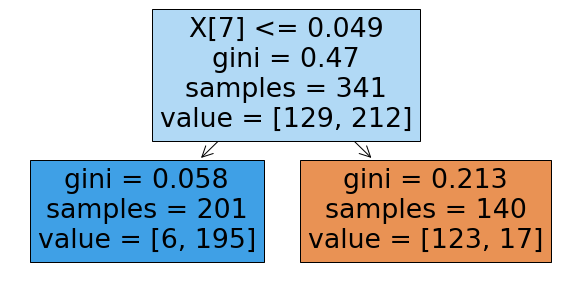

---------------------------------------------------
Training the digits dataset...
Test = 40% - Train = 60%
    Depth  Avg # of Nodes  Accuracy
1     1.0            3.00  0.191135
2     2.0            7.00  0.304256
3     3.0           15.00  0.430445
4     4.0           30.75  0.593823
5     5.0           51.00  0.647402
6     6.0           74.50  0.747720
7     7.0          103.75  0.785738
8     8.0          142.75  0.830210
9     9.0          174.75  0.811636
10   10.0          203.75  0.837693
11   11.0          214.75  0.826555
12   12.0          221.00  0.845032
13   13.0          218.75  0.824668
14   14.0          221.75  0.817268
The best value for the depth hyper-parameter is 8
Testing the digits dataset with test data and with hyper-parameter...
Number of nodes: 131
Accuracy: 0.8164116828929068
Resulting tree:


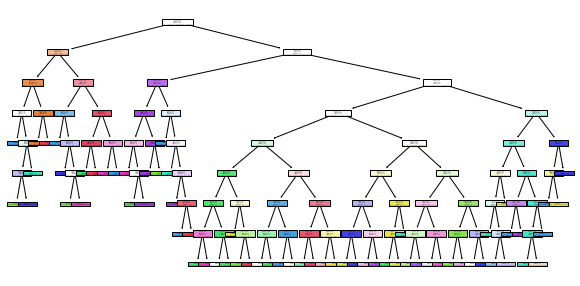

---------------------------------------------------


In [39]:
def tuningHyperParameters():
    """
    Main function to run the hyper-parameter functionality.
    Trains each dataset, finds the ideal depth for each dataset and then builds a valid classifer
    which can be tested with the test data.
    """

    datasets = {"iris": load_iris(), "breast cancer":load_breast_cancer(), "digits": load_digits()}

    print("-------------------------------------------")

    for key in datasets.keys():
        dataset = datasets[key]

        print("Training the", key, "dataset...")
        
        #Train data - split

        # Split the data in training and testing sets
        print("Test = 40% - Train = 60%")
        X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TEST_DATA_SIZE, random_state=0)

        #Loop with different depths - 1 to 10
        dataframe = pd.DataFrame(columns=['Depth', 'Avg # of Nodes', 'Accuracy'])
        for depth in range(1, 16):
        
            score, nodes, tree_depth = crossValidateAtDepth(X_train, y_train, depth)
            #Unsure if the avg # of nodes is correct
            if tree_depth < depth:
                break
            
            dataframe.loc[depth] = [tree_depth, nodes, (score)]

        print(dataframe)
        
        #split again

        # Select the best value of hyper-parameter and then use the entire training data to build a classifier. 
        best_value = findIdealDepthValueFromDataset(dataframe)
        print("The best value for the depth hyper-parameter is", best_value)

        # Report the number of nodes and the accuracy of the classifier on the test set.
        print("Testing the", key, "dataset with test data and with hyper-parameter...")
        clf = tree.DecisionTreeClassifier(max_depth=best_value)
        clf = clf.fit(X_train, y_train)
        print("Number of nodes:", clf.tree_.node_count)
        print("Accuracy:", clf.score(X_test, y_test))
        
        print("Resulting tree:")
        tree.plot_tree(clf, filled=True)
        plt.show()

        print("---------------------------------------------------")
        
tuningHyperParameters()

## Part 2 - Decision trees vs linear models
### Part 2.1 - Binary Classification Problem in R<sup>2</sup> using Logistic Regression

Fitting the classifer...
Plotting the training points...
Showing the plot:


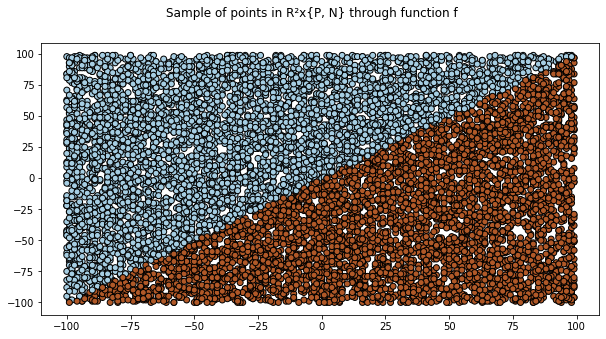

-------------------------------------------------------------------


In [40]:
def LogisticRegressionForBinaryClass():
    
    X = np.random.randint(low=-100, high=100, size=(10000, 2))
    Y = list(map(lambda x: 1 if x[0] > x[1] else 0, X))
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

    # Create an instance of Logistic Regression Classifier and fit the data.
    print("Fitting the classifer...")
    logreg.fit(X, Y)

    # Plot also the training points
    print("Plotting the training points...")
    plt.figure(1, figsize=(10,5))
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.suptitle("Sample of points in R² x {P, N} through function f")

    plt.show()

LogisticRegressionForBinaryClass()
    

### Part 2.2 - Various Tree Sizes and Training Sizes

In [14]:
def variousTreeAndTrainingSizes():
    
    dataframe = pd.DataFrame()
    
    #Loop through the training set size
    for set_size in range(1, 21):
    
        X = np.random.randint(low=-100, high=100, size=(set_size*10, 2))
        Y = list(map(lambda x: 1 if x[0] > x[1] else 0, X))

        # Split the data in training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

        #Loop with different depths - 1 to 10

        clf = tree.DecisionTreeClassifier()
        for depth in range(1, 11):

            clf = tree.DecisionTreeClassifier(max_depth=depth)
            clf = clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            dataframe.at[set_size, depth] = score

    return dataframe

    
variousTreeAndTrainingSizes()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.875000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
3,0.666667,0.666667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
4,0.625000,0.750000,0.812500,0.812500,0.812500,0.812500,0.812500,0.812500,0.812500,0.812500
5,0.950000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
6,0.750000,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
7,0.607143,0.821429,0.821429,0.857143,0.857143,0.857143,0.857143,0.678571,0.678571,0.678571
8,0.750000,0.906250,0.937500,0.937500,0.937500,1.000000,1.000000,1.000000,0.937500,0.937500
9,0.722222,0.861111,0.833333,0.916667,0.888889,0.833333,0.888889,0.833333,0.833333,0.888889
10,0.550000,0.725000,0.750000,0.825000,0.750000,0.750000,0.750000,0.825000,0.750000,0.750000


### Part 2.3 - Actual vs. Learned Class Boundaries

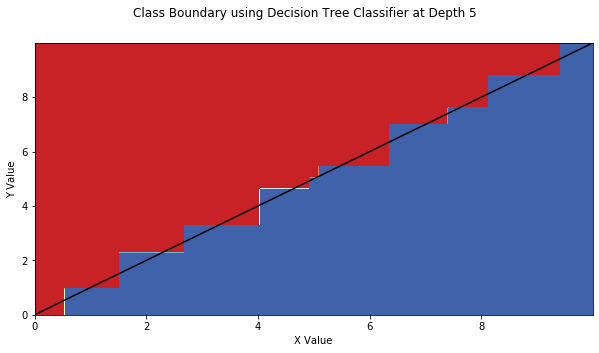

In [21]:
def actualVsLearnedClassBounds():
    
    X = np.random.uniform(0, 10, size=(10000, 2))
    Y = list(map(lambda x: 1 if x[0] > x[1] else 0, X))

    # Split the data in training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

    fig, ax = plt.subplots()
    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf.fit(x_train, y_train)

    # Parameters
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.01
    classes = [0, 1]

    # We only take the two corresponding features
    X = np.array(x_train)
    y = np.array(y_train)

    x_min, x_max = (0, 10)
    y_min, y_max = (0, 10)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c='black')
    
    # plot the actual class boundary

    plt.xlabel("X Value")
    plt.ylabel("Y Value")

    plt.suptitle("Class Boundary using Decision Tree Classifier at Depth " + str(5))
    
actualVsLearnedClassBounds()

### Part 2.4 - Very briefly (in a few sentences) discuss what would happen if the problem was Rd with a large d.

As the number of dimensions or inputs increases, the complexity (runtime) of solving this problem would increase as the Decision Tree would require a greater depth to get the same result of accuracy when comparing to the class boundary.

## Part 3 - Regression on mixed data types
### Part 3.1 - Mean Squared Error and R<sup>2</sup>

In [83]:
def regressionMixedData():
    # Reading the file, latin encoding is used to avoid some errors
    data = pd.read_csv('assignment1-2019-data.csv', encoding=('latin'), quoting=3)

    # Creating the list of input and output variables.
    inputVariables=list(data)
    del inputVariables[4]
    outputVariables=list(data)[4]
    inputData=data[inputVariables]
    
    # Dummy variable work
    for column in inputData.columns:
        if inputData[column].dtype==object:
            dummyCols=pd.get_dummies(inputData[column])
            inputData=inputData.join(dummyCols)
            del inputData[column]

    input_variables = ['X1', 'X2', 'X3', 'B', 'C']
    updatedInputData = inputData[input_variables]

    # Fit to the model    
    model_1=LinearRegression()
    model_1.fit(updatedInputData, data[outputVariables])
    print("Mean squared error:", np.mean((model_1.predict(updatedInputData) - data[outputVariables]) ** 2))
    print("R²:", model_1.score(updatedInputData, data[outputVariables]))

    # Round the coefficients of the learned model to integers and 
    # write a casebased definition of the functions identified by the regression model(s).
    coefficients = model_1.coef_
    intercept = model_1.intercept_
    rounded_coefficients = list(map(lambda x: round(x), coefficients))
        
regressionMixedData()

Mean squared error: 51.178608246662264
R²: 0.6554272705683302


In [82]:
%%latex

These equations can be shown as a system of equations.

\begin{equation*}

f(n) = \begin{cases} 
        x_{1} + 3x_{2} + 2x_{3}, & c = l_{1}\\ 
        x_{1} + 3x_{2} + 2x_{3} - 15, & c = l_{2}\\ 
        x_{1} + 3x_{2} + 2x_{3} - 11, & c = l_{3}
\end{cases}

\end{equation*}

 
\begin{equation*}

Where \space l_{1} = A, l_{2} = B \space and \space l_{3} = C.

\end{equation*}


<IPython.core.display.Latex object>

### Part 3.2 - Depending on the method you used for regression, describe how a new (unseen) data point (an input vector of size 4) can be assigned a predicted value.

For a new (unseen) data point, one can select the forumula to use to calculate the predicted output value based on the x4 value (A, B, C) of the data point (input vector).
Then, one can use that equation, as shown above, to assign that data point an predicted output value, by calculating the 'y' value based on the 'x1', 'x2' and 'x3' values.